In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [2]:
# pseq.io.download_example_data()

# data = pseq.io.load_example()

data_brain = pseq.io.read_cellranger("/Users/jason/Documents/data/fly-rnaseq/sample_19_brain/")
data_vnc = pseq.io.read_cellranger("/Users/jason/Documents/data/fly-rnaseq/sample_20_VNC/")

data = pseq.concat(data_brain, data_vnc)

data

Nep3  tRNA:Pro-CGG-1-1  CG9570  Or19b  CG15322  Or19a  karr  \
sample cell                                                                
0      0        0                 0       0      0        0      0     0   
       1        0                 0       0      0        0      0     0   
       2        0                 0       0      0        0      0     0   
       3        0                 0       0      0        0      0     0   
       4        0                 0       0      0        0      0     0   
       5        0                 0       0      0        0      0     0   
       6        0                 0       0      0        0      0     0   
       7        0                 0       0      0        0      0     0   
       8        0                 0       0      0        0      0     0   
       9        0                 0       0      0        0      0     0   
       10       0                 0       0      0        0      0     0   
       11       0                 0       0      0        0      0     0   
       12       0                 0       0      0        0      0     0   
       13       0                 0       0      0        0      0     0   
       14       0                 0       0      0        0      0     0   
       15       0                 0       0      0        0      0     0   
       16       0                 0       0      0        0      0     0   
       17       0                 0       0      0        0      0     0   
       18       0                 0       0      0        0      0     0   
       19       0                 0       0      0        0      0     0   
       20       0                 0       0      0        0      0     0   
       21       0                 0       0      0        0      0     0   
       22       0                 0       0      0        0      0     0   
       23       0                 0       0      0        0      0     0   
       24       0                 0       0      0        0      0     0   
       25       0                 0       0      0        0      0     0   
       26       0                 0       0      0        0      0     0   
       27       0                 0       0      0        0      0     0   
       28       0                 0       0      0        0      0     0   
       29       0                 0       0      0        0      0     0   
...           ...               ...     ...    ...      ...    ...   ...   
1      2629     0                 0       0      0        0      0     0   
       2630     0                 0       0      0        0      0     0   
       2631     0                 0       0      0        0      0     0   
       2632     0                 0       0      0        0      0     0   
       2633     0                 0       0      0        0      0     0   
       2634     0                 0       0      0        0      0     0   
       2635     0                 0       0      0        0      0     0   
       2636     0                 0       0      0        0      0     0   
       2637     0                 0       0      0        0      0     0   
       2638     0                 0       0      0        0      0     0   
       2639     0                 0       0      0        0      0     0   
       2640     0                 0       0      0        0      0     0   
       2641     0                 0       0      0        0      0     0   
       2642     0                 0       0      0        0      0     0   
       2643     0                 0       0      0        0      0     0   
       2644     0                 0       0      0        0      0     0   
       2645     0                 0       0      0        0      0     0   
       2646     0                 0       0      0        0      0     0   
       2647     0                 0       0      0        0      0     0   
       2648     0                 0       0      0        0  

In [3]:
dropped = data.drop_cells(umis=1).drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(5316, 17492)
(5316, 10954)


,min,max,mean,median
umis,0,3223,0,0
umis above 0,1,3223,3,1
umis per cell cell,1004,29266,2236,1559
genes expressed,249,3418,777,678
umis per gene,1,867897,1085,107
cells expressing,0,5315,139,4


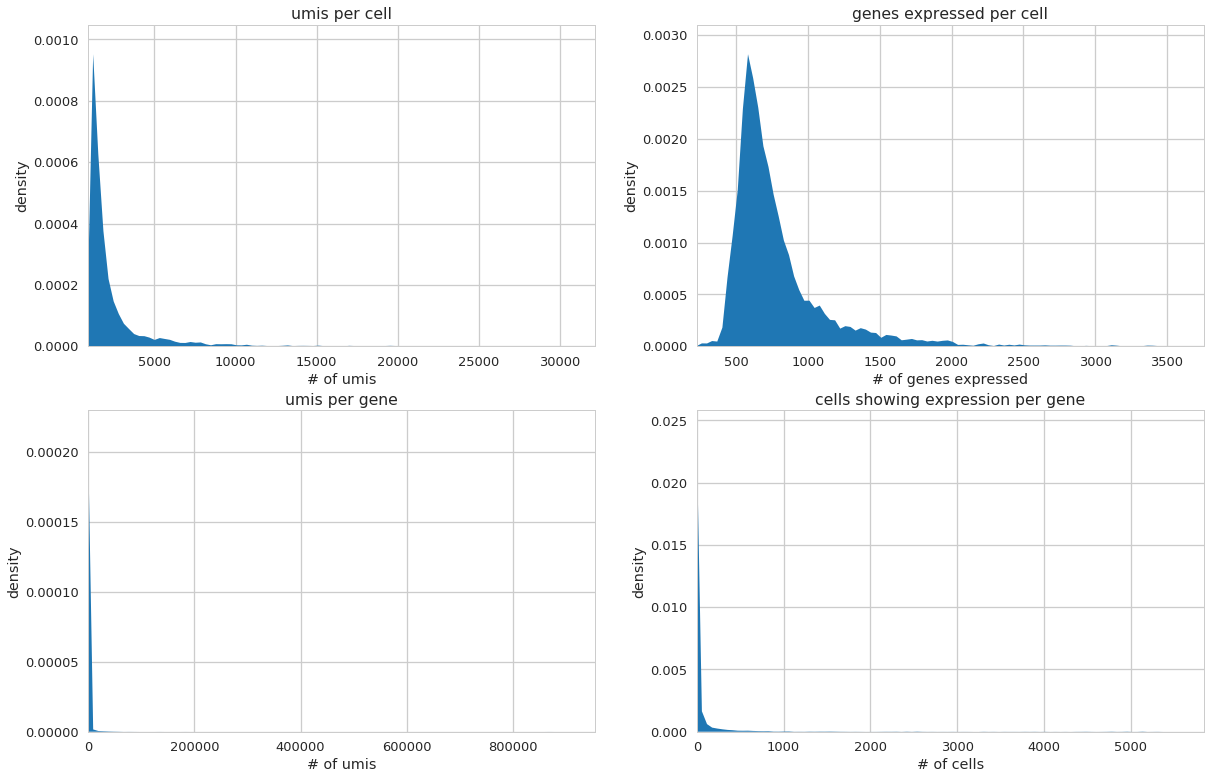

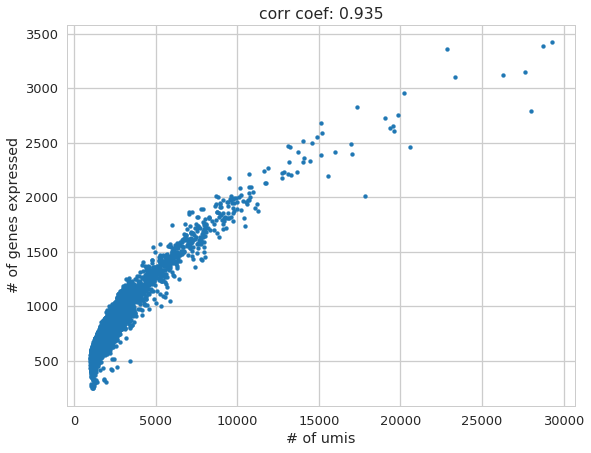

In [4]:
stats = pseq.summary.summarize(dropped)
stats

In [5]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total[:, np.newaxis])
regressed.head()

Nep3   CG12655   CG33217     Vps11     RpL10       G9a  \
sample cell                                                               
0      0    -0.120664 -0.016320 -0.138547 -0.132878 -0.051662 -0.249241   
       1    -0.113489 -0.015476 -0.094027 -0.114855  0.128791 -0.211889   
       2    -0.134410 -0.017937 -0.223832 -0.167402  0.280210 -0.320795   
       3    -0.121814 -0.016455 -0.145683 -0.135766 -0.080586 -0.255228   
       4    -0.124103 -0.016725 -0.159883 -0.141515  1.257645 -0.267142   

                  cin    CG3777   CG12470      Or1a    ...         Plap  \
sample cell                                            ...                
0      0    -0.037718 -0.016198  0.004792 -0.014181    ...    -0.072782   
       1    -0.002343 -0.013114  0.011430 -0.014308    ...    -0.035705   
       2    -0.105484 -0.022105 -0.007923 -0.013936    ...    -0.143807   
       3    -0.043388 -0.016692  0.003728 -0.014160    ...    -0.078724   
       4    -0.054672 -0.017675  0.001611 -0.014120    ...    -0.090550   

               CG5080      Tfb4      Iris      Pino    CG4629         S  \
sample cell                                                               
0      0    -0.094237 -0.081238 -0.008346 -0.067879 -0.165043 -0.203069   
       1    -0.089168 -0.057662 -0.006873 -0.051464 -0.153504  2.927208   
       2    -0.103949 -0.126402 -0.011166 -0.099324 -0.187147 -0.276199   
       3    -0.095050 -0.085017 -0.008582 -0.070510 -0.166892 -0.209188   
       4    -0.096667 -0.092537 -0.009051 -0.075746 -0.170573 -0.221364   

                 EGFP  tdTomato      GAL4  
sample cell                                
0      0    -0.093102 -0.121446 -0.052736  
       1    -0.082152 -0.108522 -0.046527  
       2    -0.114078 -0.146204 -0.064632  
       3    -0.094857 -0.123518 -0.053732  
       4    -0.098350 -0.127640 -0.055712  

[5 rows x 10954 columns]

pc-0       pc-1      pc-2      pc-3      pc-4       pc-5  \
sample cell                                                                  
0      0      0.445348  -2.725659  4.277565 -3.260357  1.582969  -2.300786   
       1     -0.344193  -4.379136  7.083571 -8.144062  4.427990  -1.762546   
       2     17.542175  -2.205299 -0.830901  1.568264 -0.550610   0.989916   
       3     15.541820  -1.012676 -2.566659  2.882676 -0.206418  -2.398046   
       4      8.088509  18.301715 -3.552315 -4.156626 -4.202396 -12.070602   

                 pc-6      pc-7      pc-8      pc-9     pc-10     pc-11  \
sample cell                                                               
0      0    -3.012452  1.809155 -1.597607 -1.147686  3.878800 -0.575684   
       1    -1.607044  0.978463  0.932822 -1.185501  4.459550 -3.240828   
       2    -5.067361 -1.208746 -1.379791  1.529935 -0.278746  2.078967   
       3    -4.942737  1.358672 -3.645118 -1.306642  0.267680  1.812635   
       4     1.081265 -4.791487  2.919544  0.602157  0.695183 -0.182567   

                pc-12     pc-13     pc-14  
sample cell                                
0      0     1.284063 -0.388526  0.654756  
       1     0.952041 -0.053312 -0.065888  
       2    -0.354390  0.123959  0.911461  
       3    -1.111008  1.635189 -1.028549  
       4    -0.576967 -1.643320 -5.135865

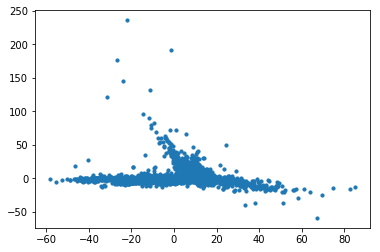

In [6]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [7]:
clustered = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: {}".format(np.unique(clustered.index.labels[2]).shape[0]))
clustered.head()

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.22724485397338867 seconds
Jaccard graph constructed in 3.706786870956421 seconds
Wrote graph to binary file in 0.9665787220001221 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.841159
After 2 runs, maximum modularity is Q = 0.843034
After 22 runs, maximum modularity is Q = 0.844192
Louvain completed 42 runs in 7.774492979049683 seconds
PhenoGraph complete in 12.88335394859314 seconds
# of clusters: 10


pc-0       pc-1      pc-2      pc-3      pc-4  \
sample cell cluster                                                       
0      0    4         0.445348  -2.725659  4.277565 -3.260357  1.582969   
       1    3        -0.344193  -4.379136  7.083571 -8.144062  4.427990   
       2    1        17.542175  -2.205299 -0.830901  1.568264 -0.550610   
       3    1        15.541820  -1.012676 -2.566659  2.882676 -0.206418   
       4    8         8.088509  18.301715 -3.552315 -4.156626 -4.202396   

                          pc-5      pc-6      pc-7      pc-8      pc-9  \
sample cell cluster                                                      
0      0    4        -2.300786 -3.012452  1.809155 -1.597607 -1.147686   
       1    3        -1.762546 -1.607044  0.978463  0.932822 -1.185501   
       2    1         0.989916 -5.067361 -1.208746 -1.379791  1.529935   
       3    1        -2.398046 -4.942737  1.358672 -3.645118 -1.306642   
       4    8       -12.070602  1.081265 -4.791487  2.919544  0.602157   

                        pc-10     pc-11     pc-12     pc-13     pc-14  
sample cell cluster                                                    
0      0    4        3.878800 -0.575684  1.284063 -0.388526  0.654756  
       1    3        4.459550 -3.240828  0.952041 -0.053312 -0.065888  
       2    1       -0.278746  2.078967 -0.354390  0.123959  0.911461  
       3    1        0.267680  1.812635 -1.111008  1.635189 -1.028549  
       4    8        0.695183 -0.182567 -0.576967 -1.643320 -5.135865

In [8]:
tsne = pseq.dim.tsne(reduced, perplexity=10.0, verbose=True)
tsne.head()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5316 samples in 0.004s...
[t-SNE] Computed neighbors for 5316 samples in 0.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5316
[t-SNE] Computed conditional probabilities for sample 2000 / 5316
[t-SNE] Computed conditional probabilities for sample 3000 / 5316
[t-SNE] Computed conditional probabilities for sample 4000 / 5316
[t-SNE] Computed conditional probabilities for sample 5000 / 5316
[t-SNE] Computed conditional probabilities for sample 5316 / 5316
[t-SNE] Mean sigma: 1.338121
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.228210
[t-SNE] Error after 1000 iterations: 1.378810


tsne-0     tsne-1
sample cell cluster                      
0      0    4         1.730823  16.237532
       1    3        -2.771096  44.040634
       2    1        80.129616  38.715012
       3    1        91.189972  16.391571
       4    8        74.473244 -28.876699

In [1]:
import matplotlib.pyplot as plt
import polyseq as pseq

In [2]:
#tsne.to_pickle("tsne.pkl")
tsne = pseq.io.read_pickle("tsne.pkl")
tsne.head()

tsne-0     tsne-1
sample cell cluster                      
0      0    4         1.730823  16.237532
       1    3        -2.771096  44.040634
       2    1        80.129616  38.715012
       3    1        91.189972  16.391571
       4    8        74.473244 -28.876699

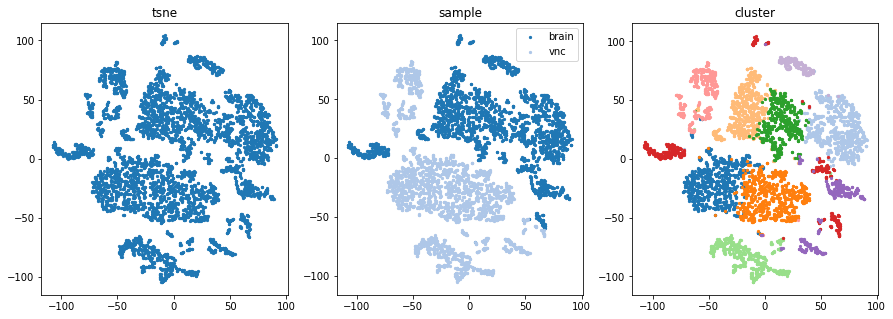

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pseq.viz.scatter(tsne, s=5, cmap="tab20")
plt.title('tsne')

plt.subplot(1, 3, 2)
pseq.viz.scatter(tsne, color_by="sample", s=5, cmap="tab20")
plt.title('sample')
plt.legend(["brain", "vnc"], scatterpoints=1)

plt.subplot(1, 3, 3)
pseq.viz.scatter(tsne, color_by="cluster", s=5, cmap="tab20")
plt.title('cluster')

plt.savefig("/Users/jason/Desktop/brain-vnc.png")

plt.show()

In [9]:
top_genes = pseq.upregulated(normed, clusters, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]

---

['futsch', '14-3-3zeta', 'Cam']
['Hsp23', 'sbb', 'wde']
['pros', 'jim', 'RpS29']
['fabp', 'Obp44a', 'CAH1']
['CR43283', 'CG3800', 'Pen']


/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


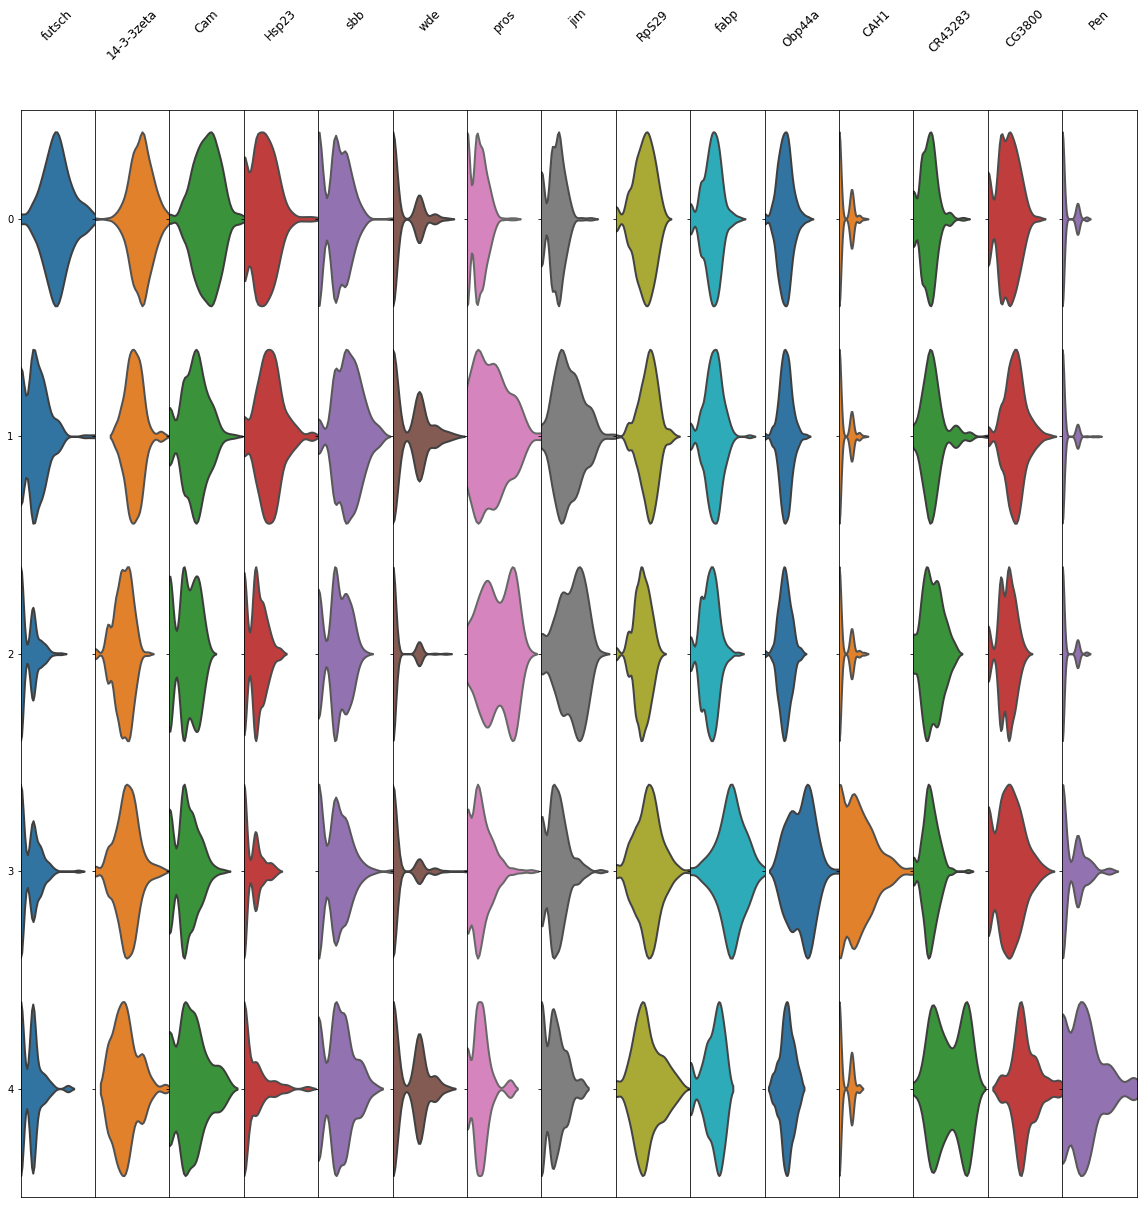

In [10]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, groups=clusters, cluster_genes=False)